## Homework #5. Behaviour exploration improvement
#### Author: `Anastasiia Parkhomenko`
#### Total time spent on h/w (in minutes): `1500`

1.кореляція кількості повідомлень і подій в світі ###DONE   
2.еволюція мови  ###DONE  
  2.1. перехід на українську, щільність використання мов рос/укр  ###DONE  
  2.2. літературність мови  ###DONE  
3.кількість активних діалогів within time  
4.кількість певних слів within time  ### кайнда DONE  
  4.1. матюки  ###DONE  
  4.2. паразити  ###DONE  
5.час відповіді within time  
6.активність в групах ###DONE  
7.присутність малочисельних груп (вказує на залученість в мікрогрупах людей, наявність певної діяльності - в моєму випадку участь в театрі, в зйомках тощо) ###DONE  
8.кількість чоловіків в особистих переписках within time    ###DONE  
9.виявлення депресії (підрахунок найвживаніших слів, виявлення тенденції поведінки)  
10.наповненість діалогів within time(аналіз довжини повідомлень, кількості стікерів, гіфок, фоток тощо) ###DONE   
11.% аудіо/відео/текст - чому я надавала перевагу within time  ###DONE  
12.порівняння активності within years of war(compare start-now)  ###DONE  
13.виявлення руснявих наративів  
14.тяжіння до певних сфер діяльності within time по аналізу слів  
15.розвиток моїх феміністичних поглядів  
16.чоловіче/жіноче питання?  
17.фігурування/згадка руснявого/українського контенту within time, щільність  
18.всілякі юзлес метрики які можна дістати

i guess i did overthinking a bit ><

[ліба для кращого аналізу телеграму](https://github.com/sockysec/Telerecon)

### Отже, як ми бачимо, я поставила собі занадто складні питання. Але спробувала дати відповідь на деякі з них.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DIALOGS_MERGED_DATA_PATH = "data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "data/merged_data/dialogs_users_all.csv"
USERS_CLEANED = "data/cleaned_data/users.csv"
MESSAGES_CLEANED = "data/cleaned_data/messages.csv"

In [4]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH, dtype={3: 'str'})

In [5]:
df_users = pd.read_csv(USERS_CLEANED)

In [6]:
df_messages = pd.read_csv(MESSAGES_CLEANED)

In [7]:
df_users = df_users[(df_users['sex'] != 'unknown') & (df_users['sex'] != 'bot')]

In [8]:
df_messages['date'] = pd.to_datetime(df_messages['date']).dt.date

In [9]:
df_meta['users'] = df_meta['users'].apply(eval)
entry_type = type(df_meta['users'].iloc[0])
print(f"The type of the first entry in 'users' column is: {entry_type}")

if entry_type == dict:
    df_meta['username'] = df_meta['users'].apply(lambda x: x.get('username'))

The type of the first entry in 'users' column is: <class 'dict'>


In [10]:
df_meta_private = df_meta[(df_meta['type'] == 'Private dialog')]

In [11]:
df_meta_private

dialog_id                           name            type  \
26434   100182975                         Ніканд  Private dialog   
26435  1001941853                УСГ медасистант  Private dialog   
26436  1005020715                           Toby  Private dialog   
26437  1017265825                 Саша Брат Вити  Private dialog   
26438  1021965769                   Женя Бабенко  Private dialog   
...           ...                            ...             ...   
26844   975635790                   Anna Nazarka  Private dialog   
26845   983000232                       Quiz Bot  Private dialog   
26846    98325644                 Dima Braginets  Private dialog   
26847   985334078  Дія – Державні послуги онлайн  Private dialog   
26848   994416057                      Kιριllo P  Private dialog   

                                                   users             username  
26434  {'user_id': 100182975, 'first_name': 'Ніканд',...  nikndrrrrrrrrrrrrrr  
26435  {'user_id': 1001941853, 'first_name': 'УСГ мед...           usgmed_bot  
26436  {'user_id': 1005020715, 'first_name': 'Toby', ...            TobyMeBot  
26437  {'user_id': 1017265825, 'first_name': 'Саша Бр...        alexandrkorak  
26438  {'user_id': 1021965769, 'first_name': 'Женя', ...            zhenia_05  
...                                                  ...                  ...  
26844  {'user_id': 975635790, 'first_name': 'Anna', '...         Anna_Nazarka  
26845  {'user_id': 983000232, 'first_name': 'Quiz Bot...              QuizBot  
26846  {'user_id': 98325644, 'first_name': 'Dima', 'l...            braginets  
26847  {'user_id': 985334078, 'first_name': 'Дія – Де...        Diia_help_bot  
26848  {'user_id': 994416057, 'first_name': 'Kιριllo'...           pervussini  

[415 rows x 5 columns]

In [12]:
df_messages

id        date    from_id          to_id fwd_from  \
0          2881  2023-11-05  542215917 -1001106762183      NaN   
1          2880  2023-11-04  422596668 -1001106762183      NaN   
2          2879  2023-11-04   38216002 -1001106762183      NaN   
3          2878  2023-11-02  372073650 -1001106762183      NaN   
4          2877  2023-10-24  435561831 -1001106762183      NaN   
...         ...         ...        ...            ...      ...   
1495089  924239  2023-01-15  278043516      994416057      NaN   
1495090  923685  2023-01-14  994416057      278043516      NaN   
1495091  923684  2023-01-14  994416057      278043516      NaN   
1495092  923659  2023-01-14  278043516      994416057      NaN   
1495093  422174  2019-10-29  999503028      278043516      NaN   

                                                   message   type  duration  \
0        Elon Musk launches AI chatbot ‘Grok,’ says it ...  photo       NaN   
1        LastPass is a good name. \n\nAfter you give up...   text       NaN   
2        https://www-coindesk-com.cdn.ampproject.org/c/...  photo       NaN   
3        https://www.jeremiahlee.com/posts/2023-eu-eida...   text       NaN   
4        GitHub - cjm00n/EvilSln: A New Exploitation Te...  photo       NaN   
...                                                    ...    ...       ...   
1495089  Добре, дякую)\nЯ вирішила вже всі питання, так...   text       NaN   
1495090                                       Я в столовці   text       NaN   
1495091        GGR274\nСилабус є, скину як дійду до ноута(   text       NaN   
1495092  Привіт\nМожеш скинути код дата саєнс, будь лас...   text       NaN   
1495093                                                NaN   text       NaN   

             dialog_id  
0       -1001106762183  
1       -1001106762183  
2       -1001106762183  
3       -1001106762183  
4       -1001106762183  
...                ...  
1495089      994416057  
1495090      994416057  
1495091      994416057  
1495092      994416057  
1495093      999503028  

[1495094 rows x 9 columns]

In [9]:
telegram_id = 278043516

## 1.кореляція кількості повідомлень і подій в світі

In [10]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [24]:
message_counts = df.groupby(['date', 'type']).size().unstack().fillna(0)
message_counts['total'] = message_counts.sum(axis=1)
top_dates = message_counts.sort_values('total', ascending=False)
top_dates = top_dates.reset_index()
top_dates

type        date  photo  sticker     text  video  voice    total
0     2022-02-25  673.0     16.0  10184.0  165.0   17.0  11055.0
1     2022-02-26  836.0     24.0   8820.0  150.0   92.0   9922.0
2     2022-02-24  407.0     30.0   8329.0  118.0    7.0   8891.0
3     2020-09-01  136.0    127.0   6203.0   37.0   45.0   6548.0
4     2022-02-27  600.0     20.0   5585.0  151.0   43.0   6399.0
...          ...    ...      ...      ...    ...    ...      ...
2339  2018-02-24    0.0      0.0      2.0    0.0    0.0      2.0
2340  2017-07-26    0.0      0.0      1.0    0.0    0.0      1.0
2341  2017-07-18    0.0      0.0      0.0    0.0    1.0      1.0
2342  2017-11-02    0.0      0.0      1.0    0.0    0.0      1.0
2343  2017-07-13    1.0      0.0      0.0    0.0    0.0      1.0

[2344 rows x 7 columns]

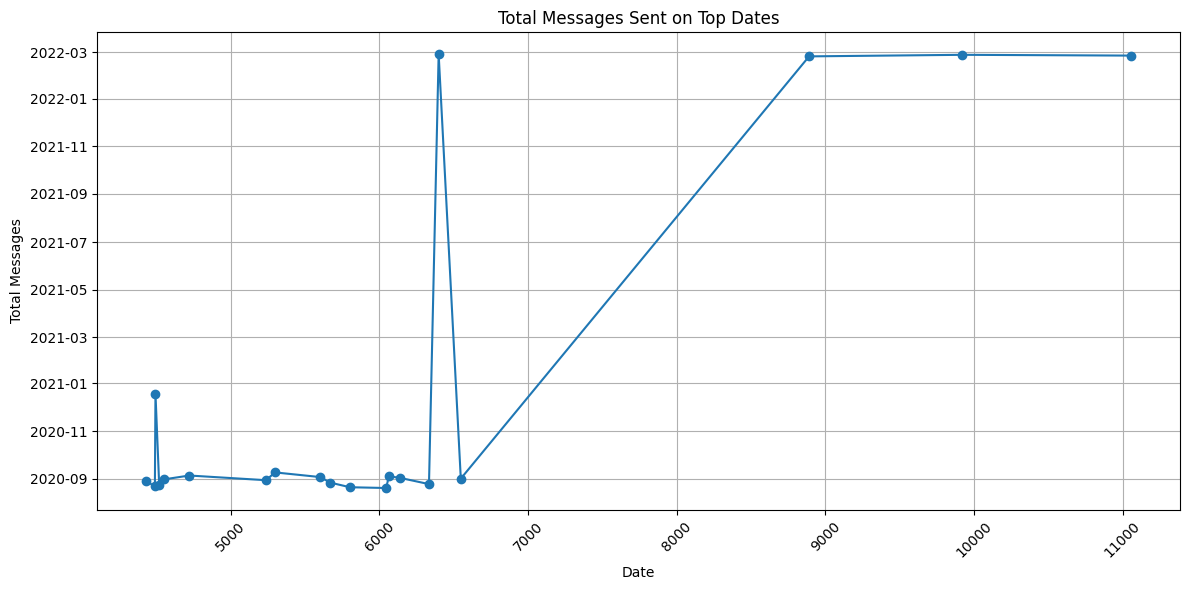

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(top_dates.head(20)['total'], top_dates.head(20)['date'], marker='o')
plt.title('Total Messages Sent on Top Dates')
plt.xlabel('Date')
plt.ylabel('Total Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
most_chattable_day = top_dates.loc[top_dates['total'].idxmax(), 'date']

print(f"The most 'chattable' day was: {most_chattable_day.strftime('%Y-%m-%d')}")

The most 'chattable' day was: 2022-02-25


#### Чітко видно, що сплеском стало повномасштабне вторгнення, коли всі чати, групи, канали активно щось постили, після чого з'явилось бажання більше дослідити поведінку в чатах відносно діт, і цієї - зокрема

Далі я вирішила провести паралелі з тим, що відбувалось кожного пікового дня.

In [30]:
from googlesearch import search
from IPython.display import display, HTML

for date in top_dates.head(10)['date']:
    date_str = date.strftime('%Y-%m-%d')
    query = f"{date_str} what happened this day"

    try:
        for j in search(query, num_results=1):
            print(f"{date_str}:")
            display(HTML(f"<a href='{j}' target='_blank'>{j}</a>"))
    except Exception as e:
        print(f"An error occurred: {e}")

2022-02-25:


2022-02-25:


2022-02-26:


2022-02-26:


2022-02-24:


2022-02-24:


2022-02-24:


2020-09-01:


2020-09-01:


2022-02-27:


2022-02-27:


2020-08-25:


2020-08-25:


2020-08-25:


2020-09-02:


2020-09-02:


2020-09-04:


2020-09-04:


2020-08-20:


2020-08-20:


2020-08-20:


2020-08-21:


2020-08-21:


2020-08-21:


In [31]:
filtered_random_msgs_recv = pd.DataFrame()

for date in top_dates['date']:
    daily_msgs = df[(df['date'] == date) & (df['to_id'] == telegram_id)]
    
    sample_size = min(10, len(daily_msgs))
    if sample_size > 0:
        daily_sample = daily_msgs.sample(n=sample_size)
        filtered_random_msgs_recv = filtered_random_msgs_recv.append(daily_sample)

filtered_random_msgs_recv = filtered_random_msgs_recv.reset_index(drop=True)

In [32]:
filtered_random_msgs_sent = pd.DataFrame()

for date in top_dates['date']:
    daily_msgs = df[(df['date'] == date) & (df['from_id'].str.contains(str(telegram_id), na=False))]
    
    sample_size = min(10, len(daily_msgs))
    if sample_size > 0:
        daily_sample = daily_msgs.sample(n=sample_size)
        filtered_random_msgs_sent = filtered_random_msgs_sent.append(daily_sample)

filtered_random_msgs_sent = filtered_random_msgs_sent.reset_index(drop=True)

In [33]:
filtered_random_msgs_recv_shrinked = filtered_random_msgs_recv[['date', 'message']]
filtered_random_msgs_recv_shrinked = filtered_random_msgs_recv_shrinked.dropna()
filtered_random_msgs_recv_shrinked.head(10)

date                                            message
0  2022-02-25                                            Как ты?
1  2022-02-25  ❗️Путин готов направить в Минск российскую дел...
2  2022-02-25                                                 ❗️
3  2022-02-25                                        Да, выходил
4  2022-02-25                         Семья Вити в безопасности?
5  2022-02-25                                         Уже отбили
6  2022-02-25  Мы все ещё на границе \nВидимо, до утра точно ...
7  2022-02-25                                       Вроде как да
8  2022-02-25                                              Я 3-4
9  2022-02-25                         Поэтому и очередь страшная

In [34]:
filtered_random_msgs_sent_shrinked = filtered_random_msgs_sent[['date', 'message']]
filtered_random_msgs_sent_shrinked = filtered_random_msgs_sent_shrinked.dropna()
filtered_random_msgs_sent_shrinked.head(10)

date                                            message
0  2022-02-25                                  ахаха, красавчики
1  2022-02-25                                сегодня без созвона
2  2022-02-25                                                 Да
3  2022-02-25                                          Шото тихо
4  2022-02-25  Нам двоє, в нас тут житло до завтра є, потім в...
5  2022-02-25                                               Окей
6  2022-02-25                                   Аптек нет рядом?
7  2022-02-25                      Успокоительные какие то взять
8  2022-02-25                                             прости
9  2022-02-25                                Я знаю, мы все одни

In [35]:
html_string = '<table>'

for date, group in filtered_random_msgs_recv_shrinked.groupby('date'):
    html_string += f'<tr style="background-color: #f2f2f2;"><th>{date}</th></tr>'
    
    for index, row in group.iterrows():
        html_string += f'<tr><td>{row["message"]}</td></tr>'

html_string += '</table>'

display(HTML(html_string))

In [36]:
html_string = '<table>'

for date, group in filtered_random_msgs_sent_shrinked.groupby('date'):
    html_string += f'<tr style="background-color: #f2f2f2;"><th>{date}</th></tr>'
    
    for index, row in group.iterrows():
        html_string += f'<tr><td>{row["message"]}</td></tr>'

html_string += '</table>'

display(HTML(html_string))

2.еволюція мови  
2.1. перехід на українську, щільність використання мов рос/укр  
2.2. літературність мови

In [37]:
from langdetect import detect
from collections import Counter

def detect_language(message):
    try:
        return detect(message)
    except:
        return 'error'

In [11]:
sent_df = df[df['from_id'].str.contains(str(telegram_id), na=False)]

In [12]:
sent_df = sent_df.dropna(subset=['message'])

In [40]:
sent_df['language'] = sent_df['message'].apply(detect_language)

In [41]:
sent_df.loc[sent_df['language'] == 'bg', 'language'] = 'uk'

In [45]:
sent_df['date'] = pd.to_datetime(sent_df['date']).dt.date
sent_df

id        date                      from_id  \
150943   165805  2020-09-16  PeerUser(user_id=278043516)   
303439      245  2020-02-17  PeerUser(user_id=278043516)   
303441      243  2020-02-17  PeerUser(user_id=278043516)   
303473      209  2020-02-15  PeerUser(user_id=278043516)   
303475      207  2020-02-15  PeerUser(user_id=278043516)   
...         ...         ...                          ...   
1495082  942613  2023-02-08  PeerUser(user_id=278043516)   
1495083  942612  2023-02-08  PeerUser(user_id=278043516)   
1495086  924548  2023-01-15  PeerUser(user_id=278043516)   
1495089  924239  2023-01-15  PeerUser(user_id=278043516)   
1495092  923659  2023-01-14  PeerUser(user_id=278043516)   

                                      to_id fwd_from  \
150943   PeerChannel(channel_id=1168659011)      NaN   
303439   PeerChannel(channel_id=1184952553)      NaN   
303441   PeerChannel(channel_id=1184952553)      NaN   
303473   PeerChannel(channel_id=1184952553)      NaN   
303475   PeerChannel(channel_id=1184952553)      NaN   
...                                     ...      ...   
1495082                           994416057      NaN   
1495083                           994416057      NaN   
1495086                           994416057      NaN   
1495089                           994416057      NaN   
1495092                           994416057      NaN   

                                                   message  type  duration  \
150943               А скиньте посилання на мемолянку пліз  text       NaN   
303439   Вместе с make, gcc и gdb файлами во время повт...  text       NaN   
303441   Пыталась подключить cygwin, но вечно выдаёт ош...  text       NaN   
303473                                     Хорошо, спасибо  text       NaN   
303475   Очная встреча на грядущей неделе состоится в п...  text       NaN   
...                                                    ...   ...       ...   
1495082             ти напланував уже собі поїздку в банф?  text       NaN   
1495083                                             привіт  text       NaN   
1495086  Буду біологічний вчити, бо соціальний має збіг...  text       NaN   
1495089  Добре, дякую)\nЯ вирішила вже всі питання, так...  text       NaN   
1495092  Привіт\nМожеш скинути код дата саєнс, будь лас...  text       NaN   

             dialog_id language  
150943  -1001168659011       uk  
303439  -1001184952553       ru  
303441  -1001184952553       ru  
303473  -1001184952553       ru  
303475  -1001184952553       ru  
...                ...      ...  
1495082      994416057       uk  
1495083      994416057       uk  
1495086      994416057       uk  
1495089      994416057       uk  
1495092      994416057       uk  

[230711 rows x 10 columns]

In [43]:
import matplotlib.pyplot as plt
from collections import Counter
import string

In [47]:
language_counts_per_day = sent_df.groupby([sent_df['date'], 'language']).size().reset_index(name='count')

language_distribution_over_time = language_counts_per_day.pivot(index='date', columns='language', values='count').fillna(0)

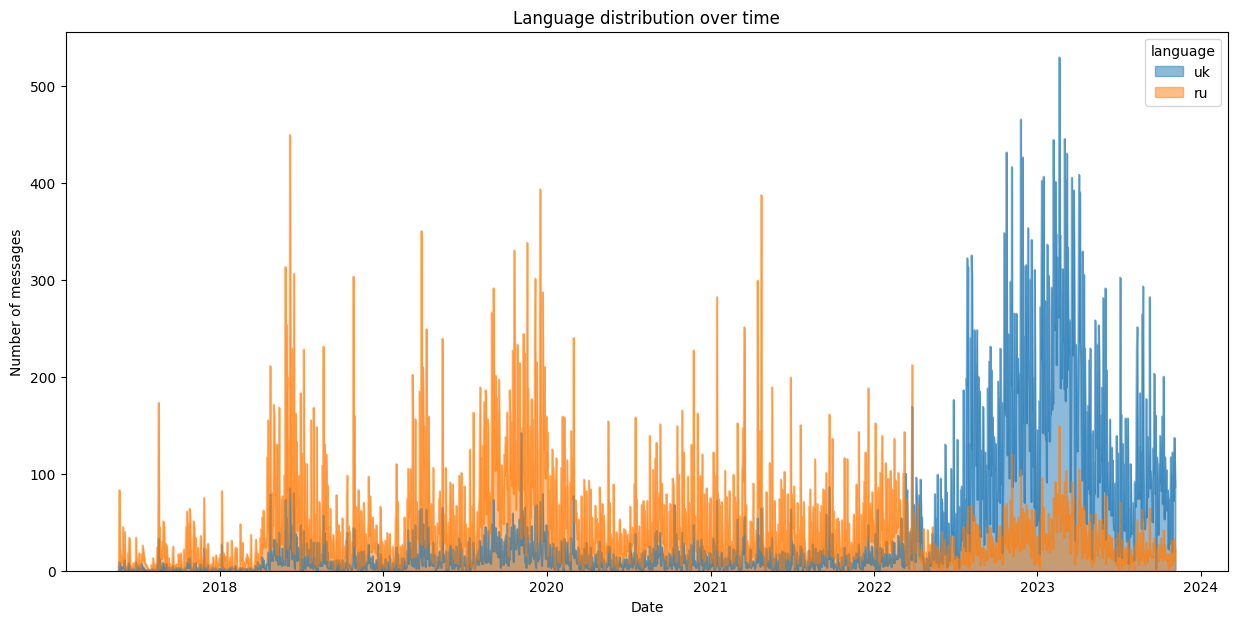

In [48]:
languages_to_plot = ['uk', 'ru']
filtered_language_distribution = language_distribution_over_time[languages_to_plot]

filtered_language_distribution.plot(kind='area', stacked=False, figsize=(15, 7), title='Language distribution over time')
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.show()

In [49]:
grouped_by_language = sent_df.groupby('language')
dfs_by_language = {language: data.dropna(subset=['message']) for language, data in grouped_by_language}

In [50]:
def clean_and_split(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return words

def count_unique_words(df):
    word_list = df['message'].apply(clean_and_split).explode()
    filtered_words = [word for word in word_list if isinstance(word, str) and len(word) > 4]
    word_counts = Counter(filtered_words)
    unique_words = len(word_counts)
    most_common_words = word_counts.most_common(20)
    return unique_words, most_common_words

In [42]:
for language, df_language in dfs_by_language.items():
    if(language == 'uk' or language == 'ru'):
        unique_words, most_common_words = count_unique_words(df_language)
        print(f"Language '{language}' has {unique_words} unique words.")
        print(f"The 20 most common words in messages with language '{language}' are: {most_common_words}\n")

Language 'ru' has 61346 unique words.
The 20 most common words in messages with language 'ru' are: [('просто', 3537), ('хорошо', 2494), ('спасибо', 2238), ('очень', 1976), ('когда', 1825), ('будет', 1671), ('может', 1412), ('только', 1383), ('сейчас', 1370), ('чтобы', 1366), ('вообще', 1321), ('сегодня', 1245), ('можно', 1197), ('потому', 1186), ('почему', 1100), ('ничего', 1090), ('чтото', 1009), ('думаю', 908), ('понимаю', 885), ('завтра', 866)]

Language 'uk' has 52260 unique words.
The 20 most common words in messages with language 'uk' are: [('просто', 1972), ('дякую', 1616), ('взагалі', 1087), ('треба', 1079), ('можна', 971), ('тільки', 783), ('навіть', 722), ('нічого', 706), ('розумію', 701), ('зараз', 666), ('сьогодні', 655), ('добре', 654), ('потім', 636), ('немає', 626), ('мабуть', 604), ('цього', 585), ('звісно', 575), ('блять', 557), ('тепер', 513), ('після', 502)]



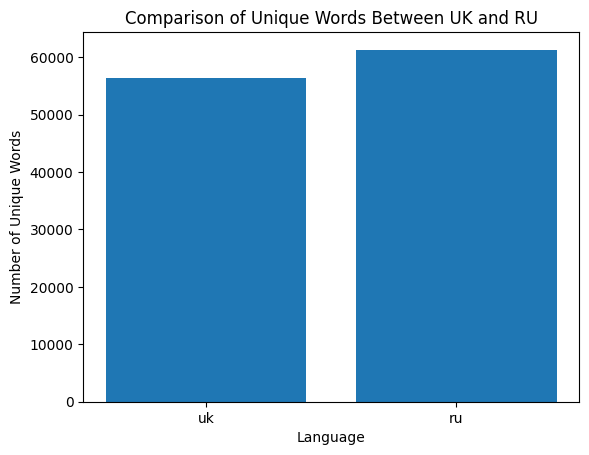

In [51]:
unique_words_data = {}
most_common_words_data = {}
for language in ['uk', 'ru']:  # Assuming 'uk' and 'ru' are keys in the 'dfs_by_language' dictionary
    df_language = dfs_by_language[language]
    unique_words, most_common_words = count_unique_words(df_language)
    unique_words_data[language] = unique_words
    most_common_words_data[language] = most_common_words
    
plt.bar(unique_words_data.keys(), unique_words_data.values())
plt.title('Comparison of Unique Words Between UK and RU')
plt.xlabel('Language')
plt.ylabel('Number of Unique Words')
plt.show()

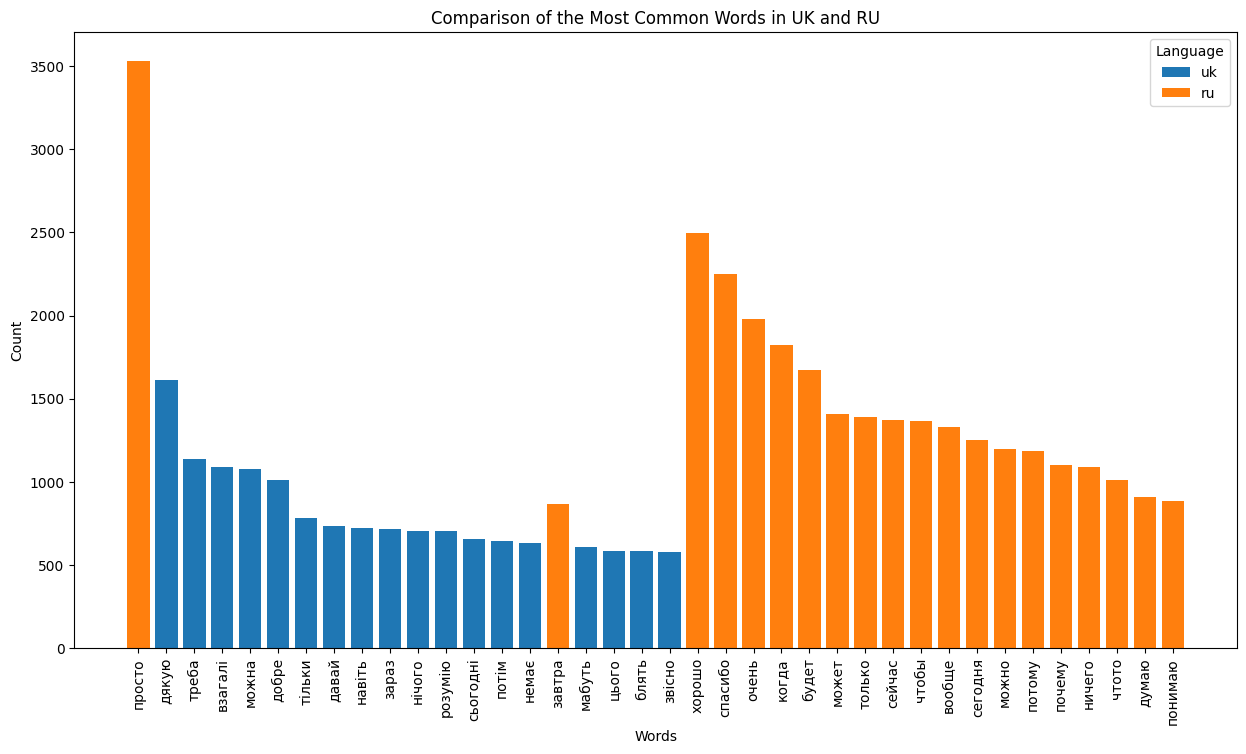

In [52]:
most_common_df = pd.DataFrame(columns=['Language', 'Word', 'Count'])

for language, words in most_common_words_data.items():
    for word, count in words:
        most_common_df = most_common_df.append({'Language': language, 'Word': word, 'Count': count}, ignore_index=True)

fig, ax = plt.subplots(figsize=(15, 8))
for language in most_common_df['Language'].unique():
    ax.bar(most_common_df[most_common_df['Language'] == language]['Word'],
           most_common_df[most_common_df['Language'] == language]['Count'],
           label=language)

ax.set_title('Comparison of the most common words in UA and RU')
ax.set_xlabel('Words')
ax.set_ylabel('Count')
plt.legend(title='Language')
plt.xticks(rotation=90)
plt.show()

In [53]:
group_counts = df_meta.groupby(['dialog_id', 'name']).size().reset_index(name='participant_count')
filtered_groups = group_counts[(group_counts['participant_count'] >= 3) & (group_counts['participant_count'] <= 40)]
filtered_groups

dialog_id                                        name  \
0   -1001971323629                Комп'ютерна вірусологія (КН)   
3   -1001953285283                        IT право, 4 підгрупа   
4   -1001907877434                                         CSS   
7   -1001815340491                                      Котон🐱   
8   -1001783423226                                       ОШІ 🧠   
..             ...                                         ...   
168     -259621175                              Одесса Мамма☀️   
169     -253834321                           Америка 90-х. Ніч   
170     -235405786  Morshinska(разбитая стая отшельников((((((   
171     -202778195                       Клип на качающий трек   
172     -200159969                                    Соняшник   

     participant_count  
0                   32  
3                    5  
4                   16  
7                    9  
8                   37  
..                 ...  
168                  3  
169                  7  
170                 30  
171                 12  
172                  7  

[130 rows x 3 columns]

In [54]:
merged_df = pd.merge(sent_df, filtered_groups, on='dialog_id', how='inner')

In [55]:
messages_per_dialog = merged_df.groupby('dialog_id').size().reset_index(name='message_count')
messages_per_dialog

dialog_id  message_count
0   -1001971323629              2
1   -1001953285283             88
2   -1001771078366             11
3   -1001770291620              3
4   -1001762101043              4
..             ...            ...
98      -259621175              2
99      -253834321              3
100     -235405786            260
101     -202778195              9
102     -200159969              7

[103 rows x 2 columns]

In [56]:
messages_sent_by_me_per_chat = pd.merge(messages_per_dialog, filtered_groups, on='dialog_id', how='inner')
messages_sent_by_me_per_chat = messages_sent_by_me_per_chat.sort_values(by='message_count', ascending=False).head(30)

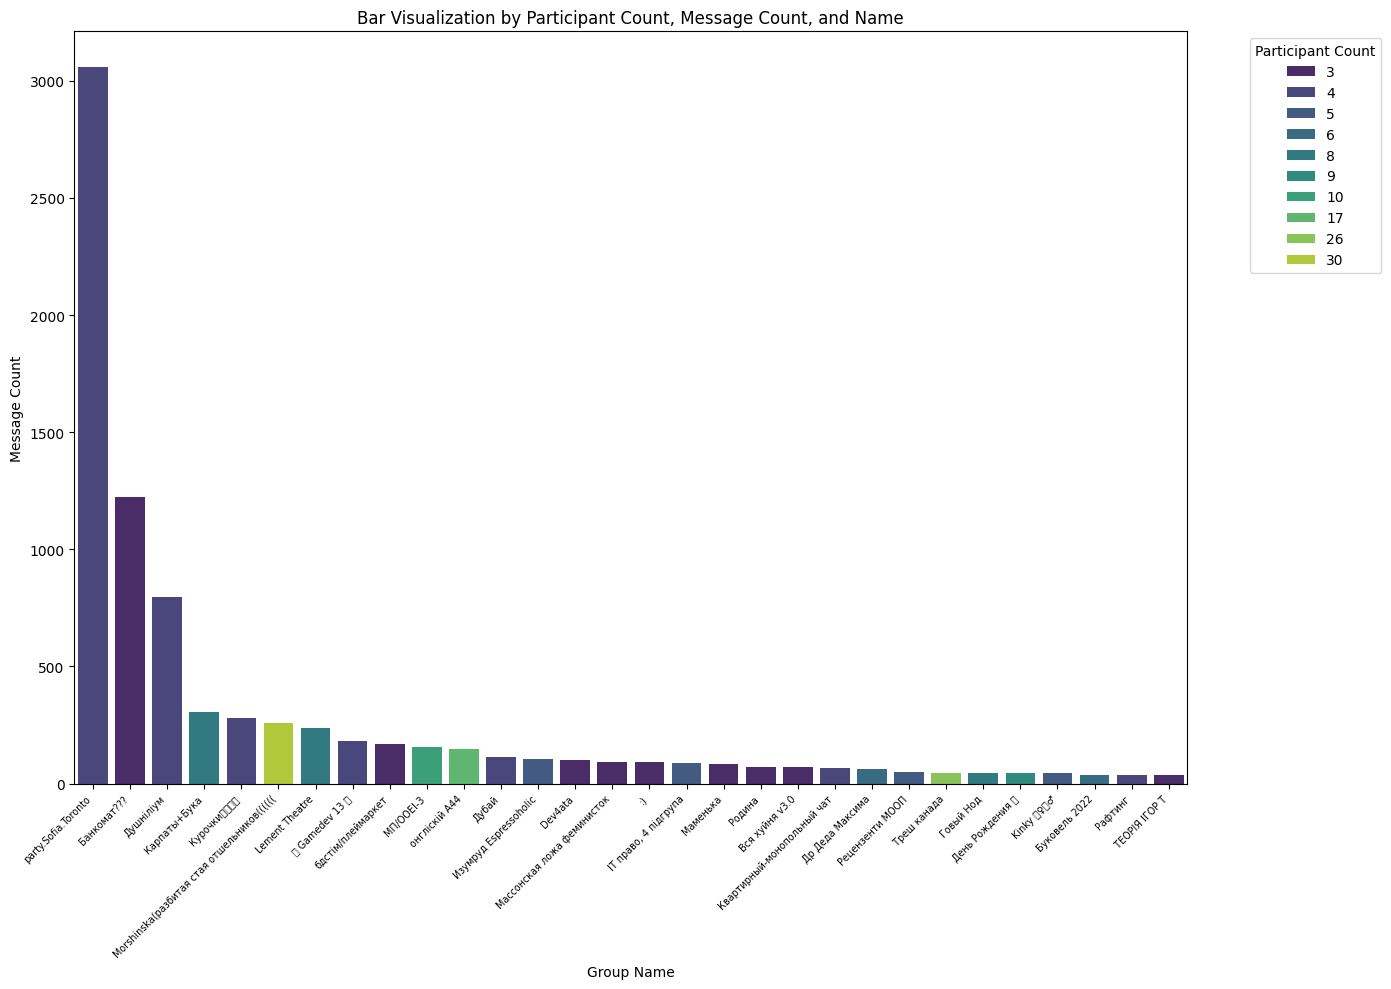

In [57]:
import seaborn as sns

plt.figure(figsize=(14, 10))

sns.barplot(x='name', y='message_count', data=messages_sent_by_me_per_chat, hue='participant_count', dodge=False, palette='viridis')

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-small')
plt.xlabel('Group Name')
plt.ylabel('Message Count')
plt.title('Bar Visualization by Participant Count, Message Count, and Name')

plt.legend(title='Participant Count', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
import matplotlib.dates as mdates

sent_df['date'] = pd.to_datetime(sent_df['date'])
df_war = (sent_df[sent_df['date'] >= '2022-02-24']).sort_values(by='date', ascending=True)
message_counts = df_war.groupby(df_war['date'].dt.to_period('D')).size()

In [59]:
message_counts.index = message_counts.index.to_timestamp()

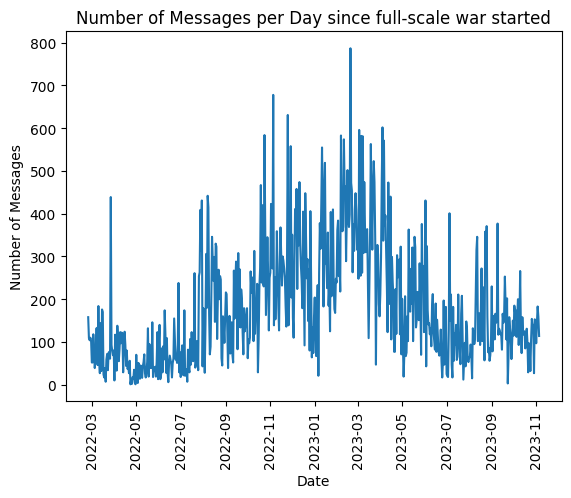

In [60]:
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per Day since full-scale war started')
plt.xticks(rotation=90)
plt.plot(message_counts.index, message_counts.values)

In [61]:
merged_df = pd.merge(df_messages, df_users, left_on='dialog_id', right_on='user_id', how='inner')

In [62]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [63]:
grouped_df = merged_df[['date', 'sex']]

In [64]:
grouped_df['count'] = 1
daily_sex_count = grouped_df.groupby(['date', 'sex']).count().reset_index()
pivot_table = daily_sex_count.pivot(index='date', columns='sex', values='count').fillna(0)
pivot_table['more_messages'] = pivot_table.apply(lambda x: 'female' if x.get('female', 0) > x.get('male', 0) else 'male', axis=1)

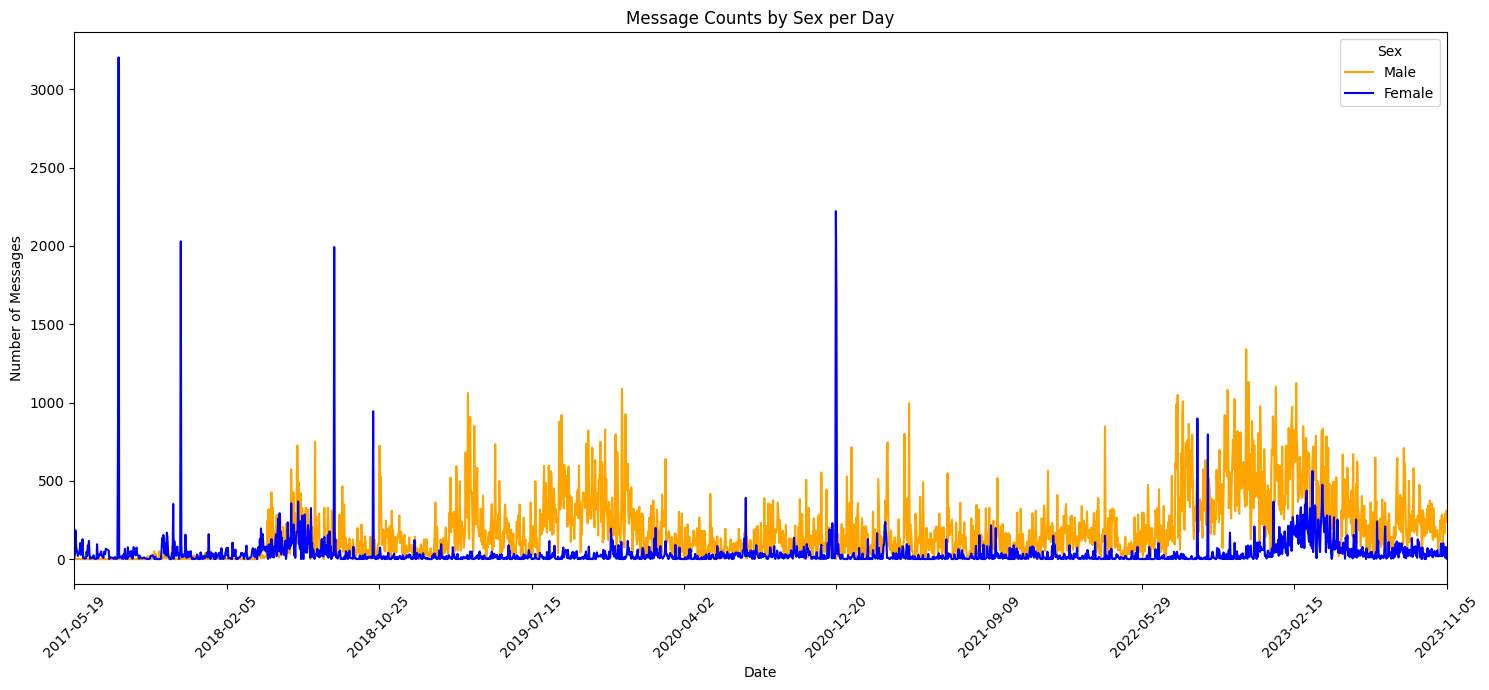

In [65]:
date_ticks = pd.date_range(start=pivot_table.index.min(), end=pivot_table.index.max(), periods=10).date
plt.figure(figsize=(15, 7))

plt.plot(pivot_table.index, pivot_table['male'], label='Male', color='orange')
plt.plot(pivot_table.index, pivot_table['female'], label='Female', color='blue')

plt.xticks(date_ticks, rotation=45)
plt.xlim(pivot_table.index.min(), pivot_table.index.max())

plt.title('Message Counts by Sex per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')

plt.legend(title='Sex')

plt.tight_layout()
plt.show()

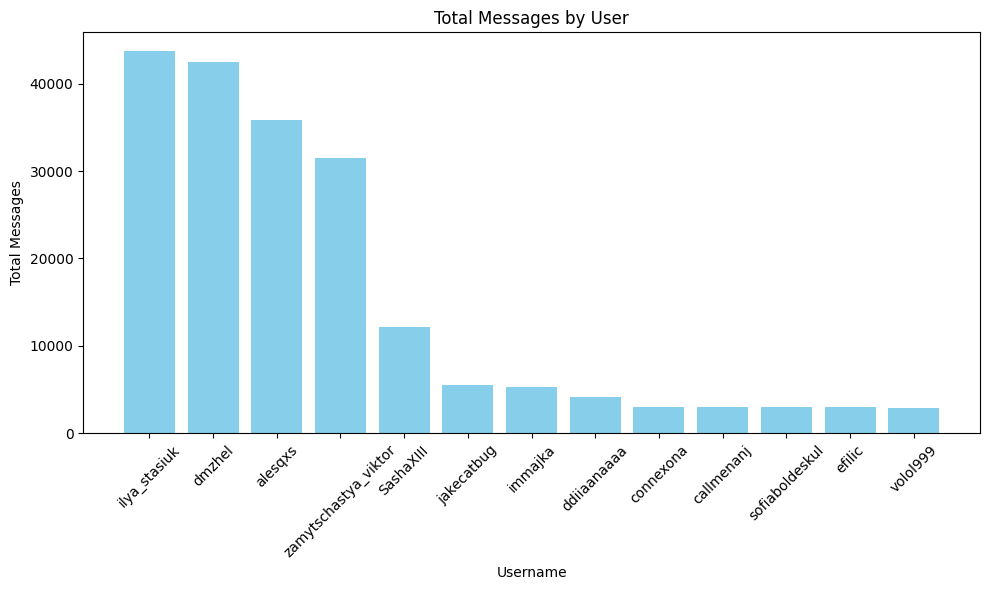

In [68]:
top_receivers = sent_df.groupby('dialog_id').agg(total_messages=('message', 'count')).reset_index()
top_receivers = top_receivers.sort_values(by='total_messages', ascending=False).head(10)
top_receivers = top_receivers.merge(df_meta[['dialog_id', 'username']], on='dialog_id', how='left')
top_receivers = top_receivers[['dialog_id', 'username', 'total_messages']]

plt.figure(figsize=(10, 6))
plt.bar(top_receivers['username'], top_receivers['total_messages'], color='skyblue') 
plt.title('Total Messages by User')
plt.xlabel('Username')
plt.ylabel('Total Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
merged = pd.merge(df_meta_private, df_messages, on='dialog_id')
merged = merged.drop(columns='fwd_from')
merged_top = pd.merge(top_receivers, merged, on='username')
merged_top = merged_top.drop(columns=['from_id', 'to_id', 'dialog_id_y'])

In [70]:
df_first_message = merged_top.groupby('username')['date'].min().reset_index()
df_first_message.columns = ['username', 'first_message_date']

In [71]:
df_im_tired = df_first_message.merge(top_receivers, on='username')

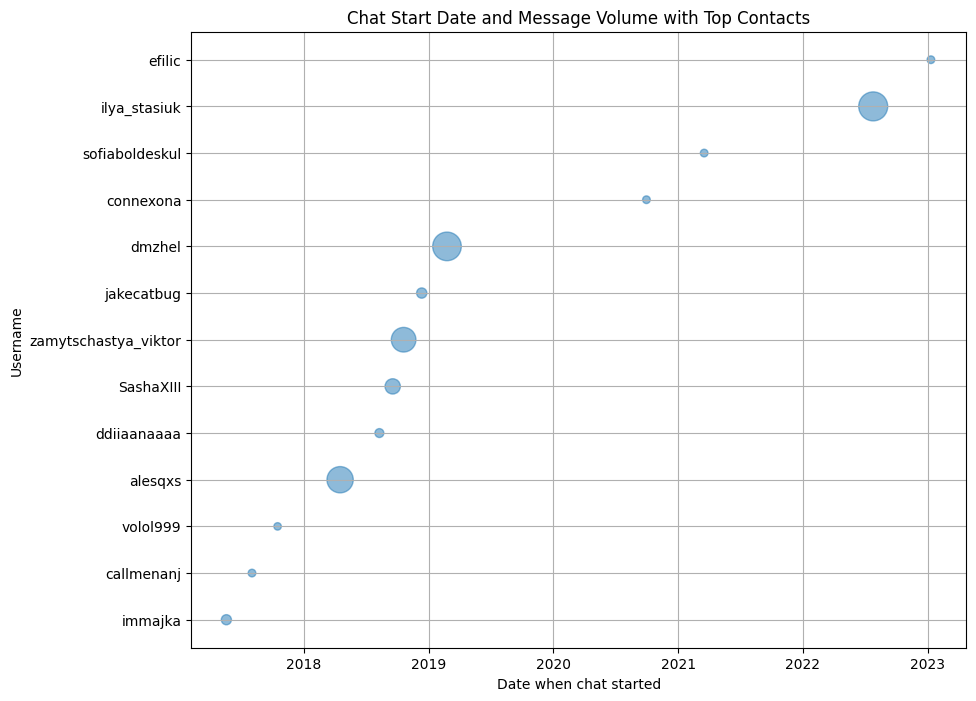

In [72]:
import matplotlib.dates as mdates
df_im_tired_sorted = df_im_tired.sort_values(by='first_message_date')

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df_im_tired_sorted['first_message_date'], df_im_tired_sorted['username'], s=df_im_tired_sorted['total_messages']/100, alpha=0.5)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlabel('Date when chat started')
ax.set_ylabel('Username')
ax.set_title('Chat Start Date and Message Volume with Top Contacts')

ax.grid(True)
plt.show()

### HW 5

In [73]:
merged_df.columns

Index(['id', 'date', 'from_id', 'to_id', 'fwd_from', 'message', 'type',
       'duration', 'dialog_id', 'user_id', 'first_name', 'last_name',
       'username', 'phone', 'sex'],
      dtype='object')

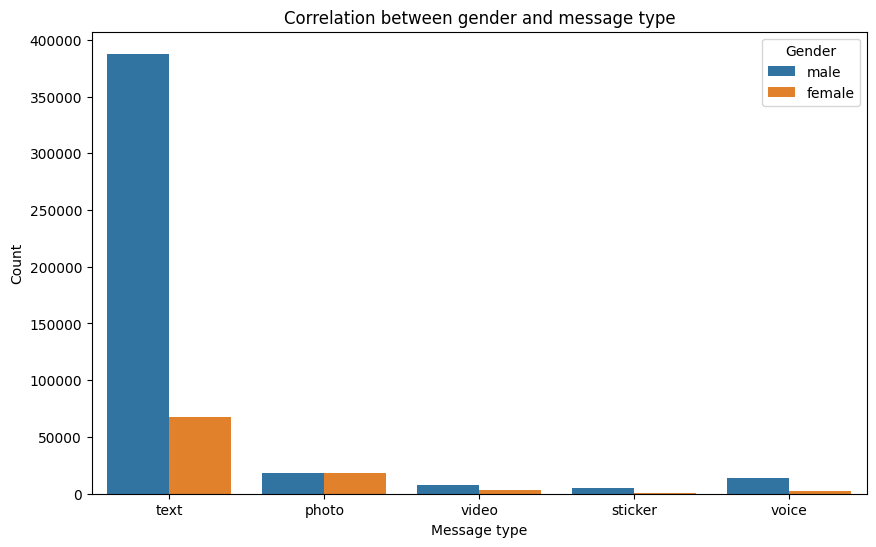

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='sex', data=merged_df)

plt.title('Correlation between gender and message type')
plt.xlabel('Message type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [76]:
import re
from collections import defaultdict
from collections import Counter

wordlist = ['бля', 'хуй', 'пізд', 'йоб']

pattern = '|'.join([f'\\w*{word}\\w*' for word in wordlist])
compiled_pattern = re.compile(pattern, re.IGNORECASE)
text_messages = merged_df[merged_df['type'] == 'text']
text_messages = text_messages.dropna(subset=['message'])
root_counts_per_date = defaultdict(Counter)

for date, message in zip(text_messages['date'], text_messages['message']):
    if message is None:
        continue
    matches = compiled_pattern.findall(message)
    for match in matches:
        root = next((word for word in wordlist if word in match.lower()), None)
        if root:
            root_counts_per_date[root][date] += 1

In [77]:
daily_counts = {date: dict(counts) for date, counts in root_counts_per_date.items()}
daily_counts_df = pd.DataFrame.from_dict(daily_counts, orient='index').fillna(0)
daily_counts_df = daily_counts_df.transpose()

In [78]:
daily_counts_df.index = pd.to_datetime(daily_counts_df.index)

In [79]:
monthly_counts_df = daily_counts_df.resample('M').sum()
monthly_counts_df.index = monthly_counts_df.index.strftime('%Y-%m')

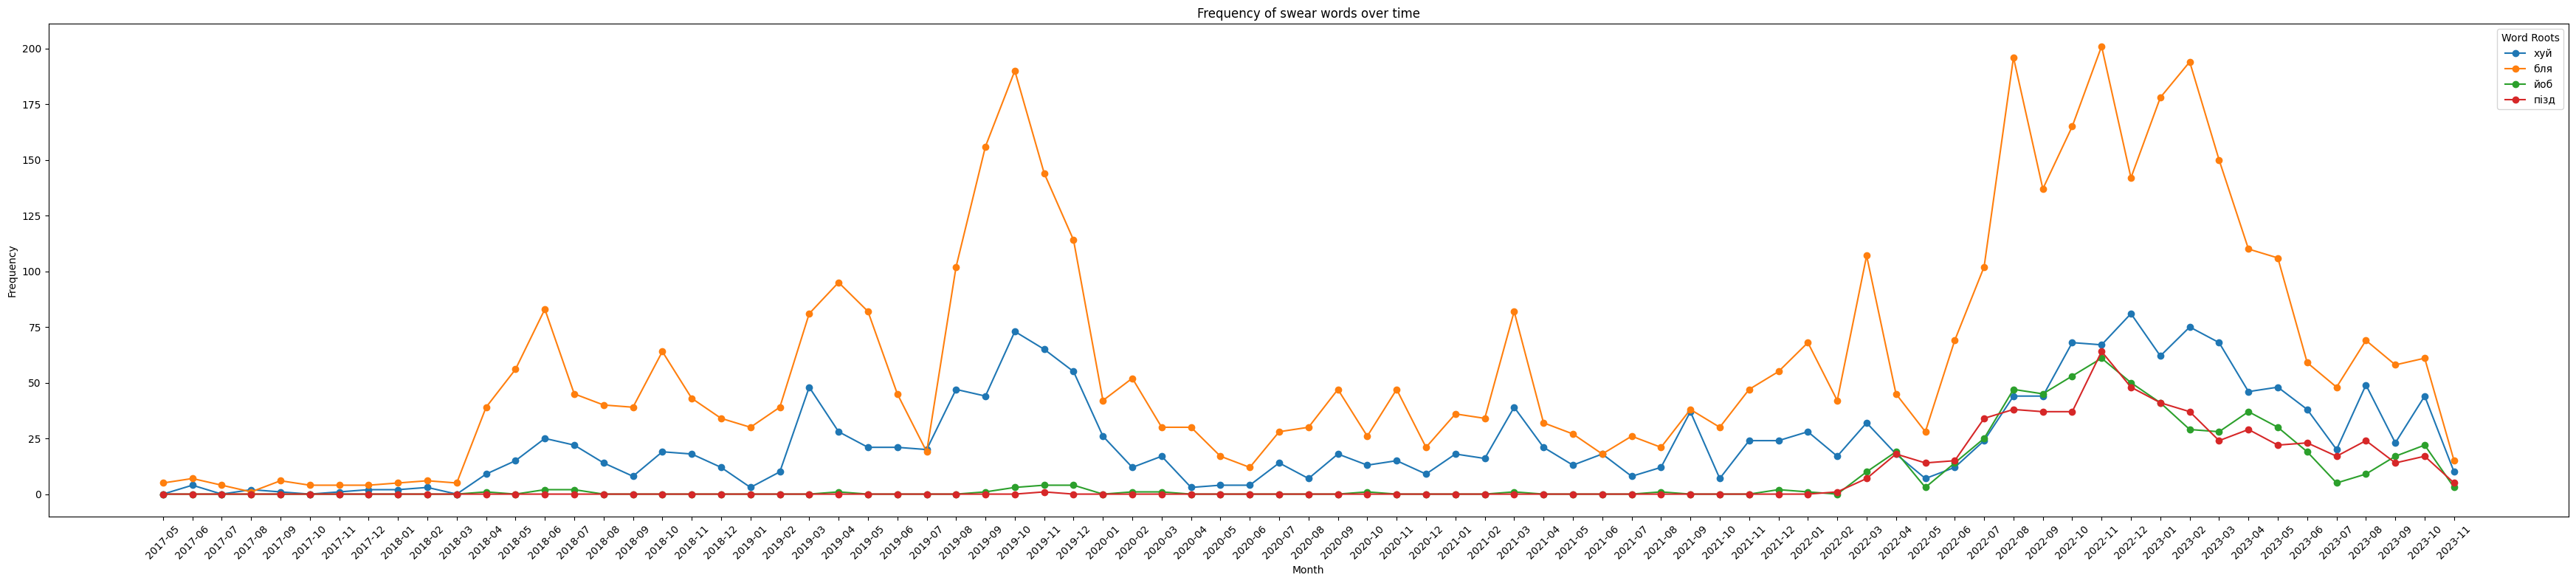

In [80]:
plt.figure(figsize=(35, 8))

for column in monthly_counts_df.columns:
    plt.plot(monthly_counts_df.index, monthly_counts_df[column], marker='o', linestyle='-', label=column)

plt.title('Frequency of swear words over time')   
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Word Roots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
private_dialogs = df_messages[df_messages["dialog_id"] >= 0]
private_dialogs = private_dialogs[private_dialogs['type'] == 'text']
private_dialogs = private_dialogs.dropna(subset=['message'])

In [15]:
def clean_split_remove_stopwords(text):
    words = re.sub(r'[^\w\s]', '', text).lower().split()
    return [word for word in words if word not in stopwords]

In [18]:
import re

In [20]:
stopwords = pd.read_csv("tone-dict-ukrainian/dicts/ukrainian_stopwords.txt", header=None, names=['stopwords'])
stopwords = list(stopwords.stopwords)

In [ ]:
private_dialogs['word'] = private_dialogs['message'].apply(clean_split_remove_stopwords)

In [102]:
private_dialogs_exploded = private_dialogs.explode('word', ignore_index=True)
private_dialogs_final = private_dialogs_exploded[['dialog_id', 'date', 'word']].dropna(subset=['word'])

In [103]:
private_dialogs_word_count = private_dialogs_final.groupby(['dialog_id', 'word']).size().reset_index(name='frequency')
private_dialogs_word_count

dialog_id     word  frequency
0           429000       10          3
1           429000  100x100          1
2           429000       11          3
3           429000       12          3
4           429000       13          3
...            ...      ...        ...
444957  6607641634      use          1
444958  6607641634     uses          1
444959  6607641634     with          1
444960  6607641634     your          3
444961  6607641634    yours          1

[444962 rows x 3 columns]

In [104]:
merged_df = pd.merge(private_dialogs_word_count, df_users, left_on='dialog_id', right_on='user_id', how='inner')
sorted_merged_df = merged_df.sort_values(by='frequency', ascending=False)
sorted_merged_df

dialog_id         word  frequency     user_id          first_name  \
410846   729318464         цьом       1592   729318464        Персональний   
288209   398062207         хочу       1297   398062207                Дима   
248470   398062207         день        978   398062207                Дима   
144147   349316514          бля        961   349316514              Санчик   
193439   349316514         хочу        794   349316514              Санчик   
...            ...          ...        ...         ...                 ...   
166914   349316514   начальниці          1   349316514              Санчик   
166913   349316514   начальницю          1   349316514              Санчик   
166912   349316514  начальником          1   349316514              Санчик   
166899   349316514          нач          1   349316514              Санчик   
418301  5546564604        іннер          1  5546564604  Karina Plakhotniuk   

       last_name           username         phone     sex  
410846   Відьмак       ilya_stasiuk  3.809697e+11    male  
288209       NaN             dmzhel  3.806666e+11    male  
248470       NaN             dmzhel  3.806666e+11    male  
144147       NaN            alesqxs  3.809931e+11    male  
193439       NaN            alesqxs  3.809931e+11    male  
...          ...                ...           ...     ...  
166914       NaN            alesqxs  3.809931e+11    male  
166913       NaN            alesqxs  3.809931e+11    male  
166912       NaN            alesqxs  3.809931e+11    male  
166899       NaN            alesqxs  3.809931e+11    male  
418301       NaN  karinaplakhotniuk           NaN  female  

[418302 rows x 9 columns]

In [105]:
top_10_dialogs = sorted_merged_df.groupby('dialog_id')['frequency'].sum().nlargest(10).index
filtered_df = sorted_merged_df[sorted_merged_df['dialog_id'].isin(top_10_dialogs)]
filtered_df

dialog_id         word  frequency    user_id    first_name last_name  \
410846  729318464         цьом       1592  729318464  Персональний   Відьмак   
288209  398062207         хочу       1297  398062207          Дима       NaN   
248470  398062207         день        978  398062207          Дима       NaN   
144147  349316514          бля        961  349316514        Санчик       NaN   
193439  349316514         хочу        794  349316514        Санчик       NaN   
...           ...          ...        ...        ...           ...       ...   
166915  349316514    начальной          1  349316514        Санчик       NaN   
166914  349316514   начальниці          1  349316514        Санчик       NaN   
166913  349316514   начальницю          1  349316514        Санчик       NaN   
166912  349316514  начальником          1  349316514        Санчик       NaN   
166899  349316514          нач          1  349316514        Санчик       NaN   

            username         phone   sex  
410846  ilya_stasiuk  3.809697e+11  male  
288209        dmzhel  3.806666e+11  male  
248470        dmzhel  3.806666e+11  male  
144147       alesqxs  3.809931e+11  male  
193439       alesqxs  3.809931e+11  male  
...              ...           ...   ...  
166915       alesqxs  3.809931e+11  male  
166914       alesqxs  3.809931e+11  male  
166913       alesqxs  3.809931e+11  male  
166912       alesqxs  3.809931e+11  male  
166899       alesqxs  3.809931e+11  male  

[290166 rows x 9 columns]

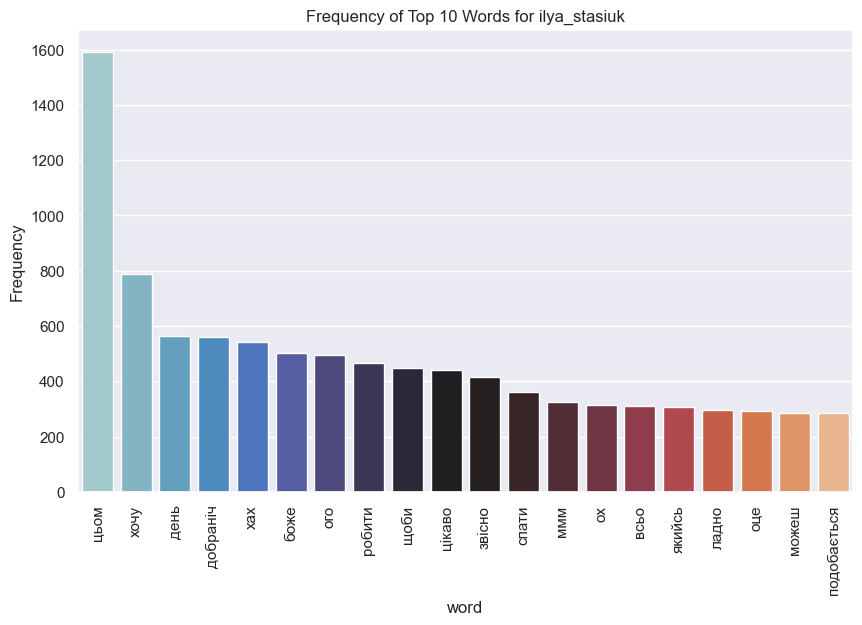

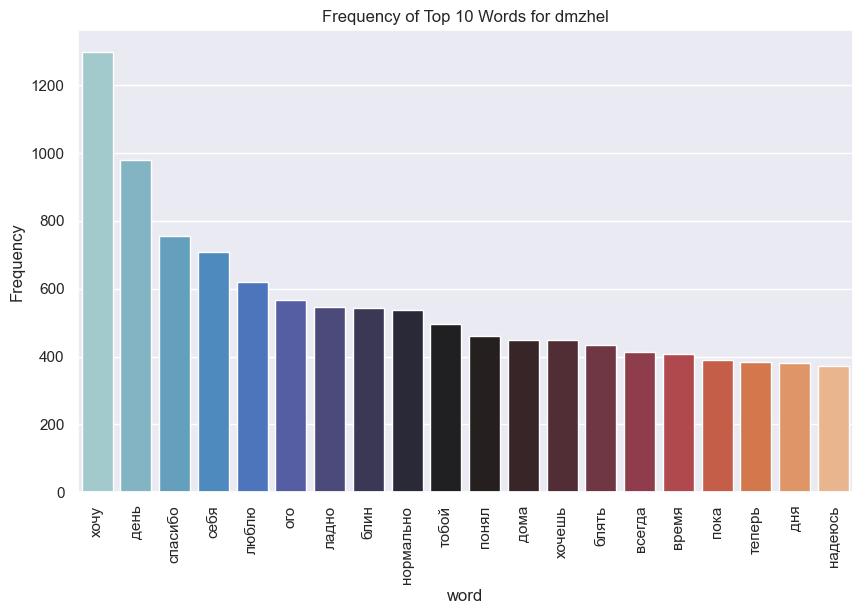

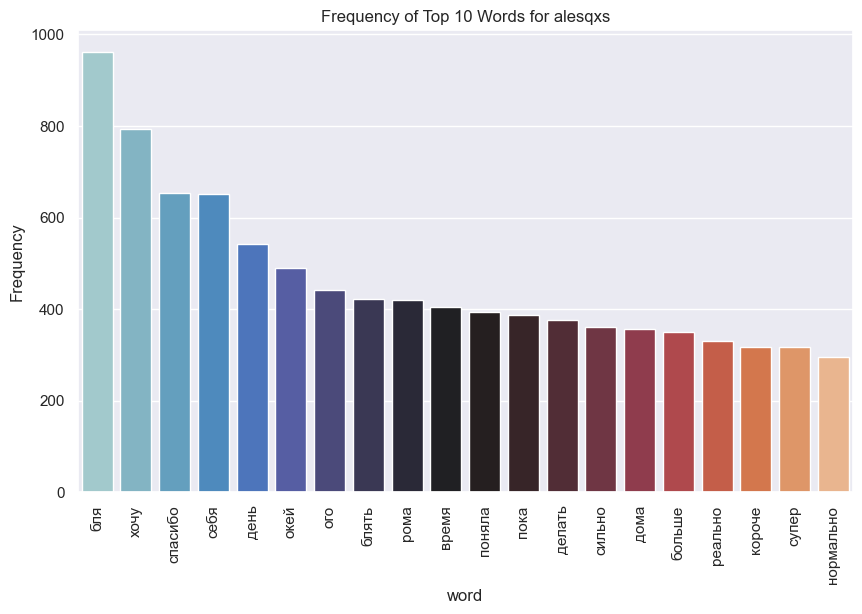

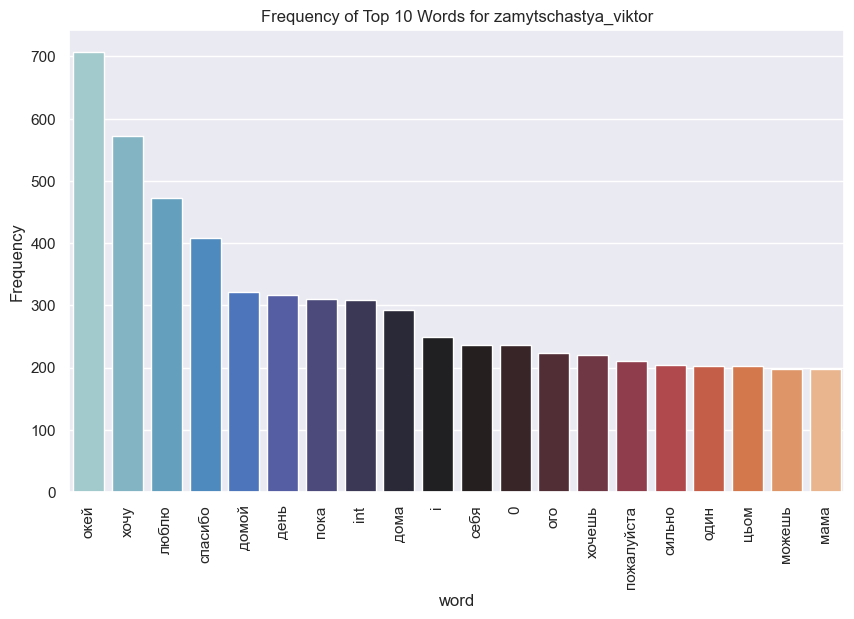

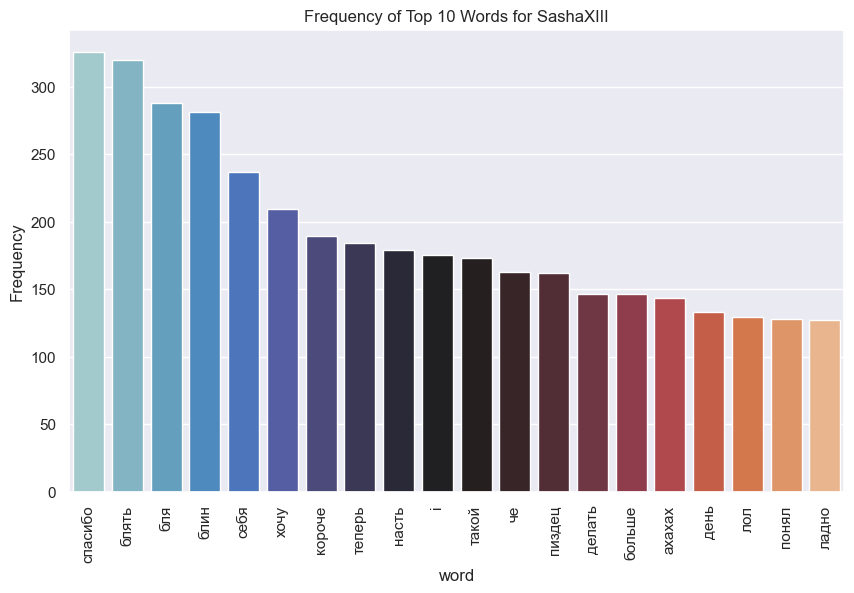

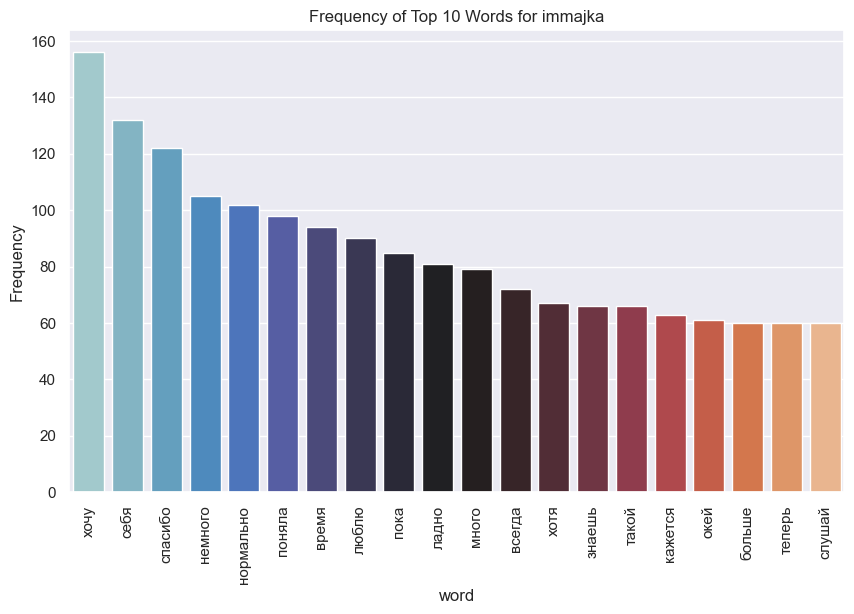

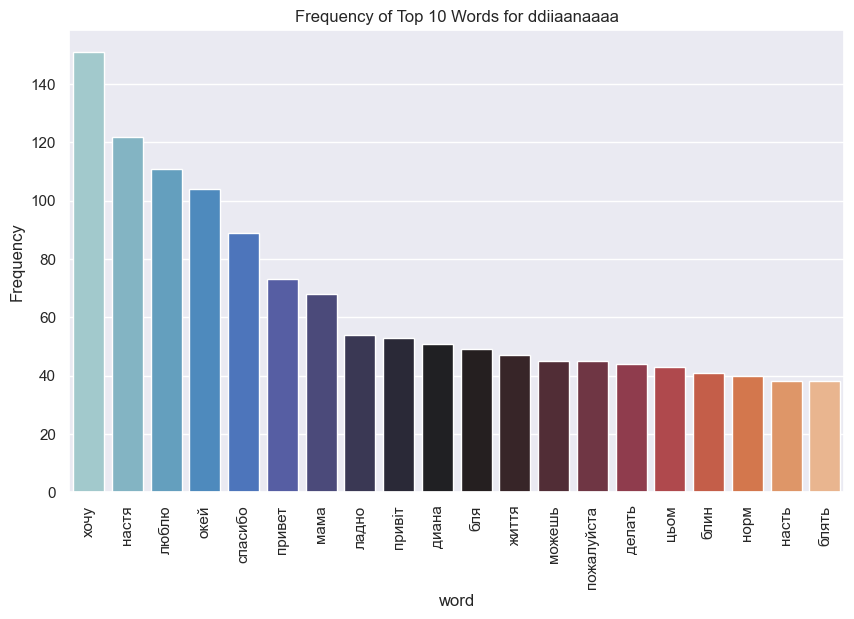

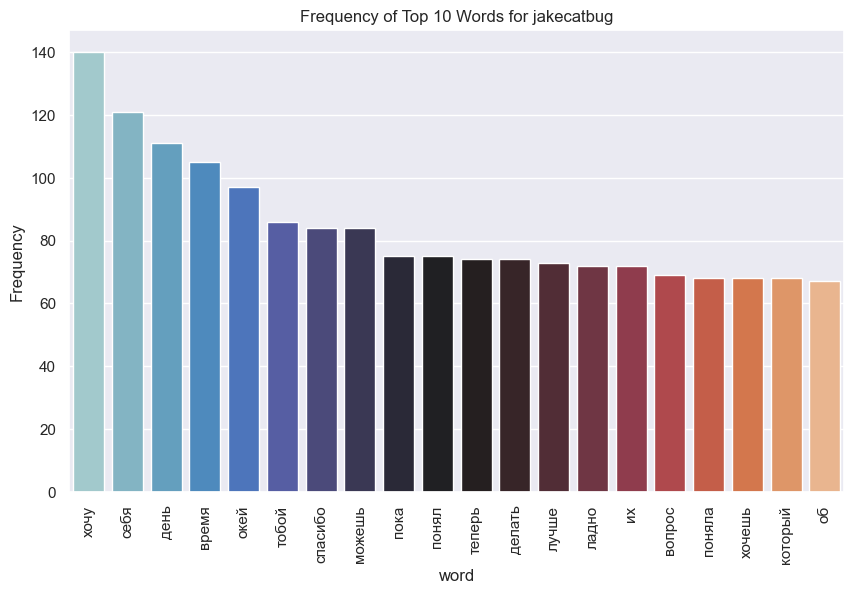

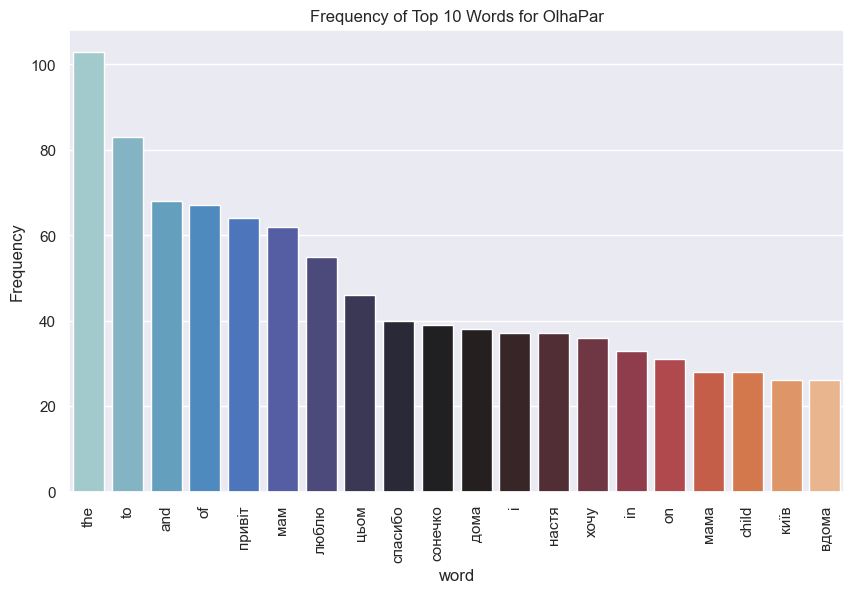

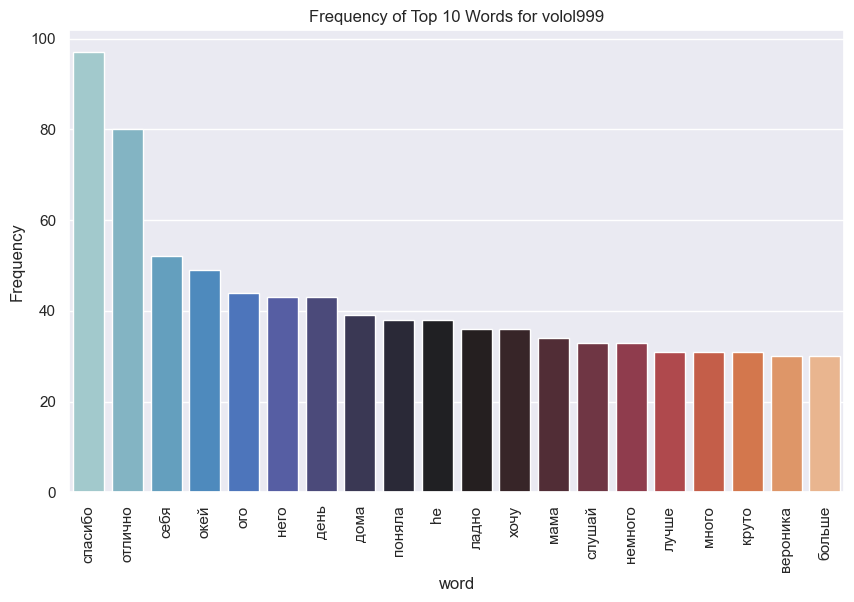

In [106]:
sns.set(style="darkgrid")
for dialog_id in filtered_df['dialog_id'].unique():
    dialog_df = filtered_df[filtered_df['dialog_id'] == dialog_id]
    top_words_df = dialog_df.sort_values(by='frequency', ascending=False).head(20)
    username = top_words_df['username'].iloc[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='word', y='frequency', data=top_words_df, palette='icefire')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Top 10 Words for {username}')
    plt.xticks(rotation=90)
    plt.show()

In [16]:
def clean_message(text):
    words = clean_split_remove_stopwords(text)
    return " ".join(words)

In [21]:
sent_df = sent_df[sent_df['type'] == 'text']
sent_df['message'] = sent_df['message'].apply(clean_message)

In [22]:
messages = sent_df['message']

In [23]:
def generate_bigrams(words):
    bigram_list = list(zip(words, words[1:]))
    return [" ".join(bigram) for bigram in bigram_list]

In [24]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import itertools

In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)
words = vectorizer.get_feature_names_out()

In [26]:
bigrams = [generate_bigrams(message.split()) for message in messages]
bigrams_messages = pd.DataFrame({
    'message': messages,
    'bigram': bigrams
})

In [29]:
all_bigrams = list(itertools.chain(*bigrams_messages['bigram']))

In [32]:
all_bigrams_df = pd.DataFrame(pd.Series(all_bigrams).value_counts())
all_bigrams_df = all_bigrams_df.reset_index()
all_bigrams_df.columns = ["bigram", "count"]
all_bigrams_df = all_bigrams_df.sort_values(by='count', ascending=False)

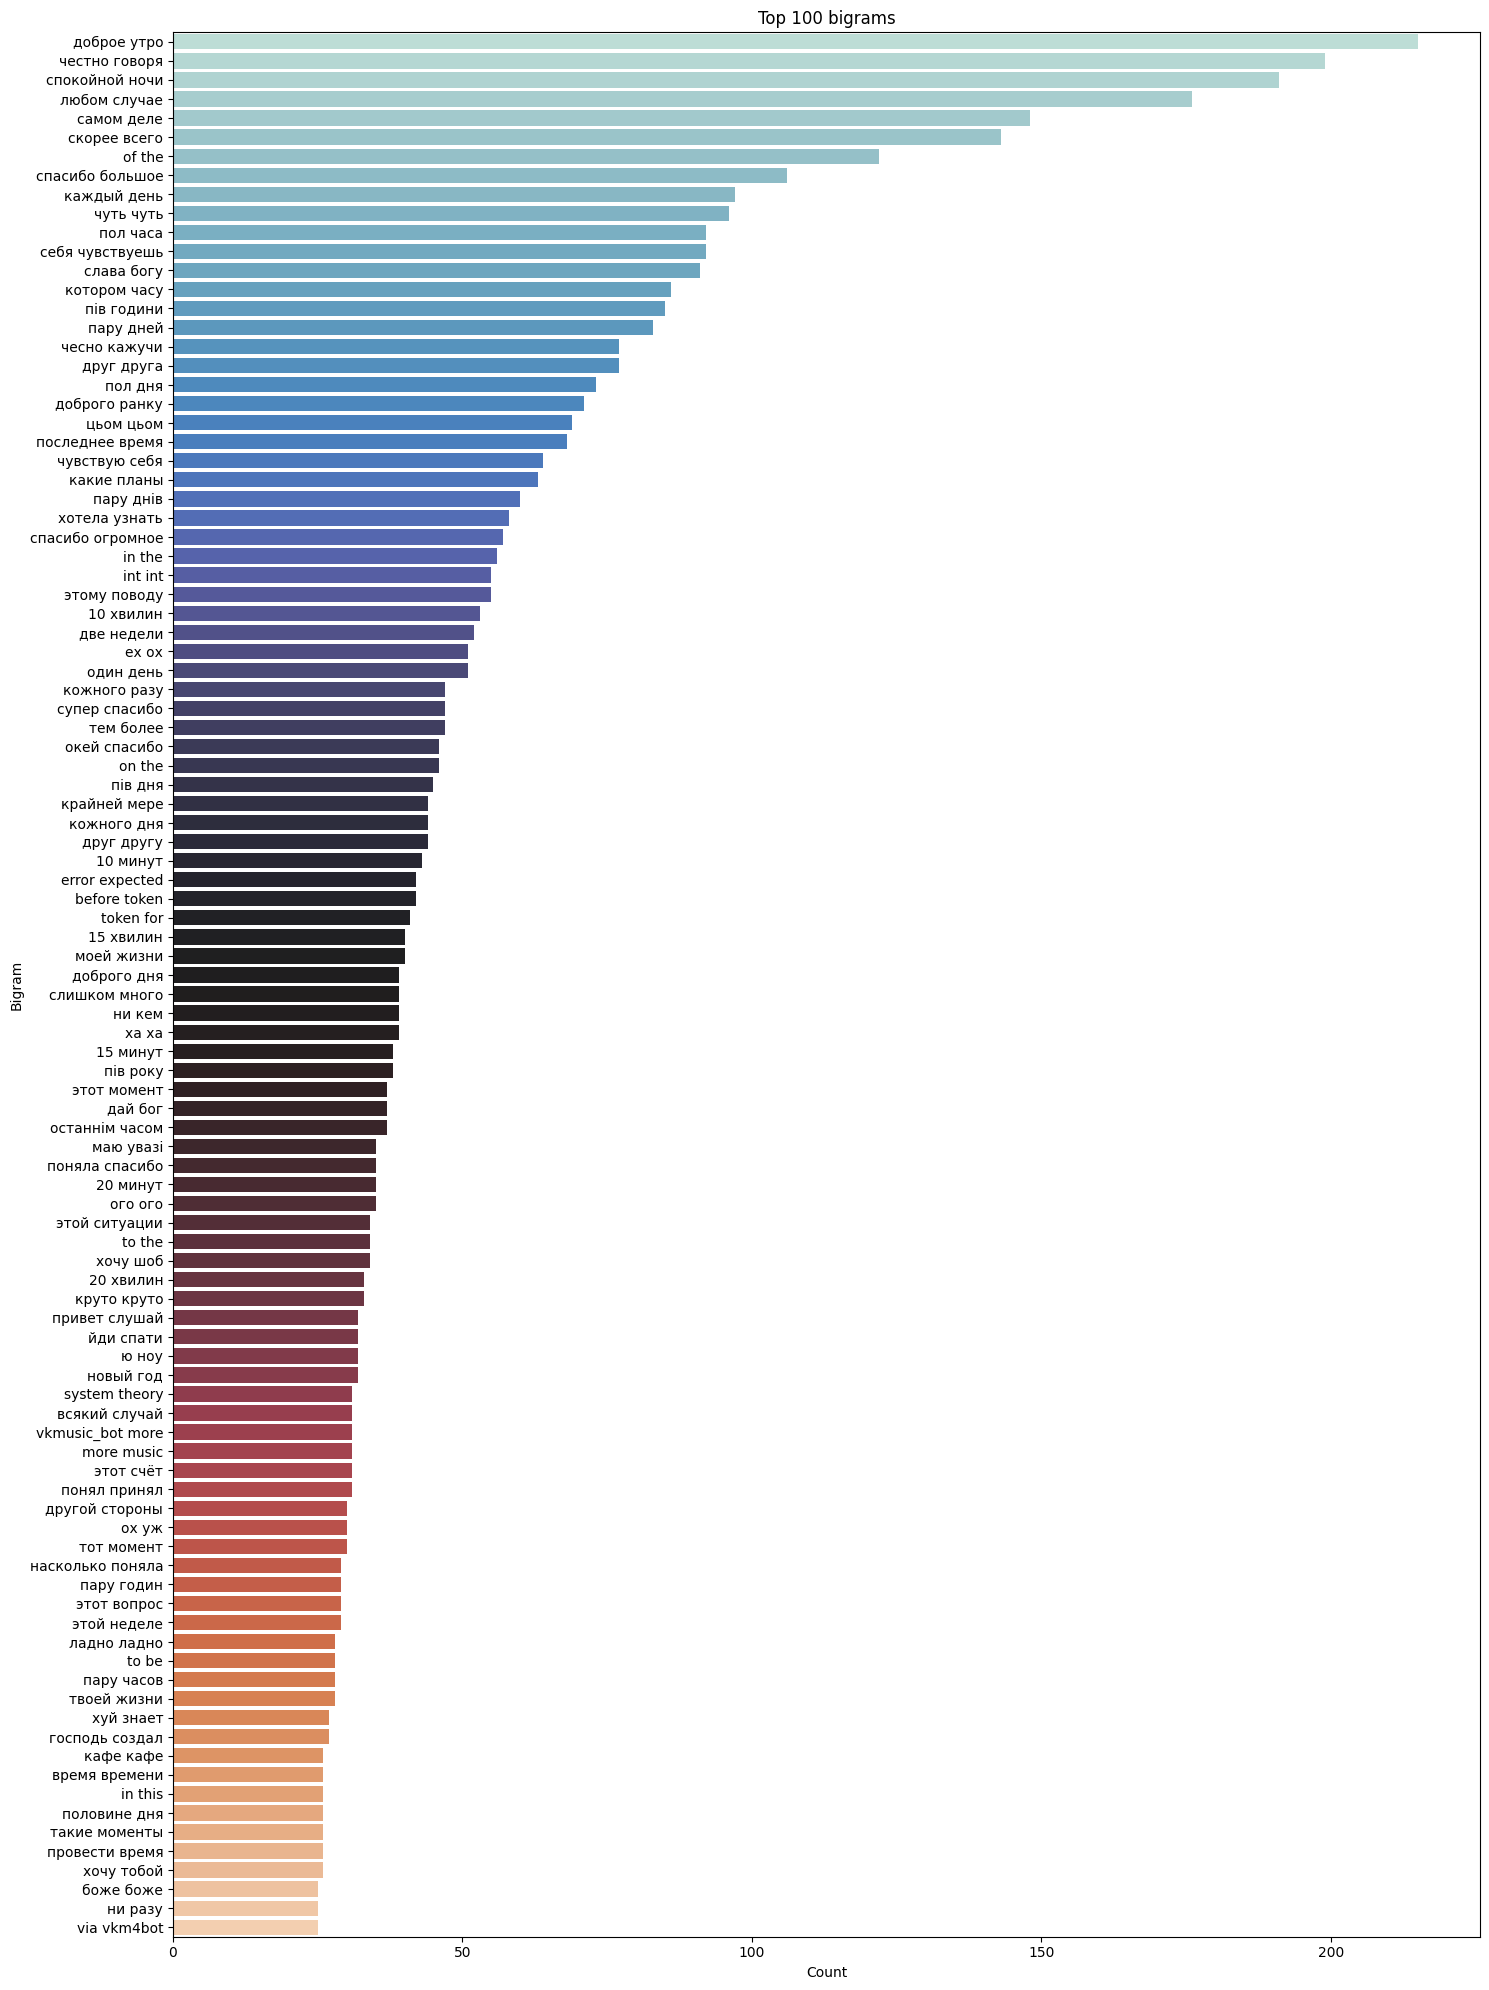

In [36]:
plt.figure(figsize=(15, 20))

sns.barplot(x='count', y='bigram', data=all_bigrams_df.head(100), palette='icefire')

plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 100 bigrams')
plt.tight_layout()
plt.show()

In [48]:
graph = nx.Graph()

for index, row in all_bigrams_df.head(100).iterrows():
    bigram = row['bigram']
    frequency = row['count']
    word1, word2 = bigram.split()
    graph.add_edge(word1, word2, weight=frequency)

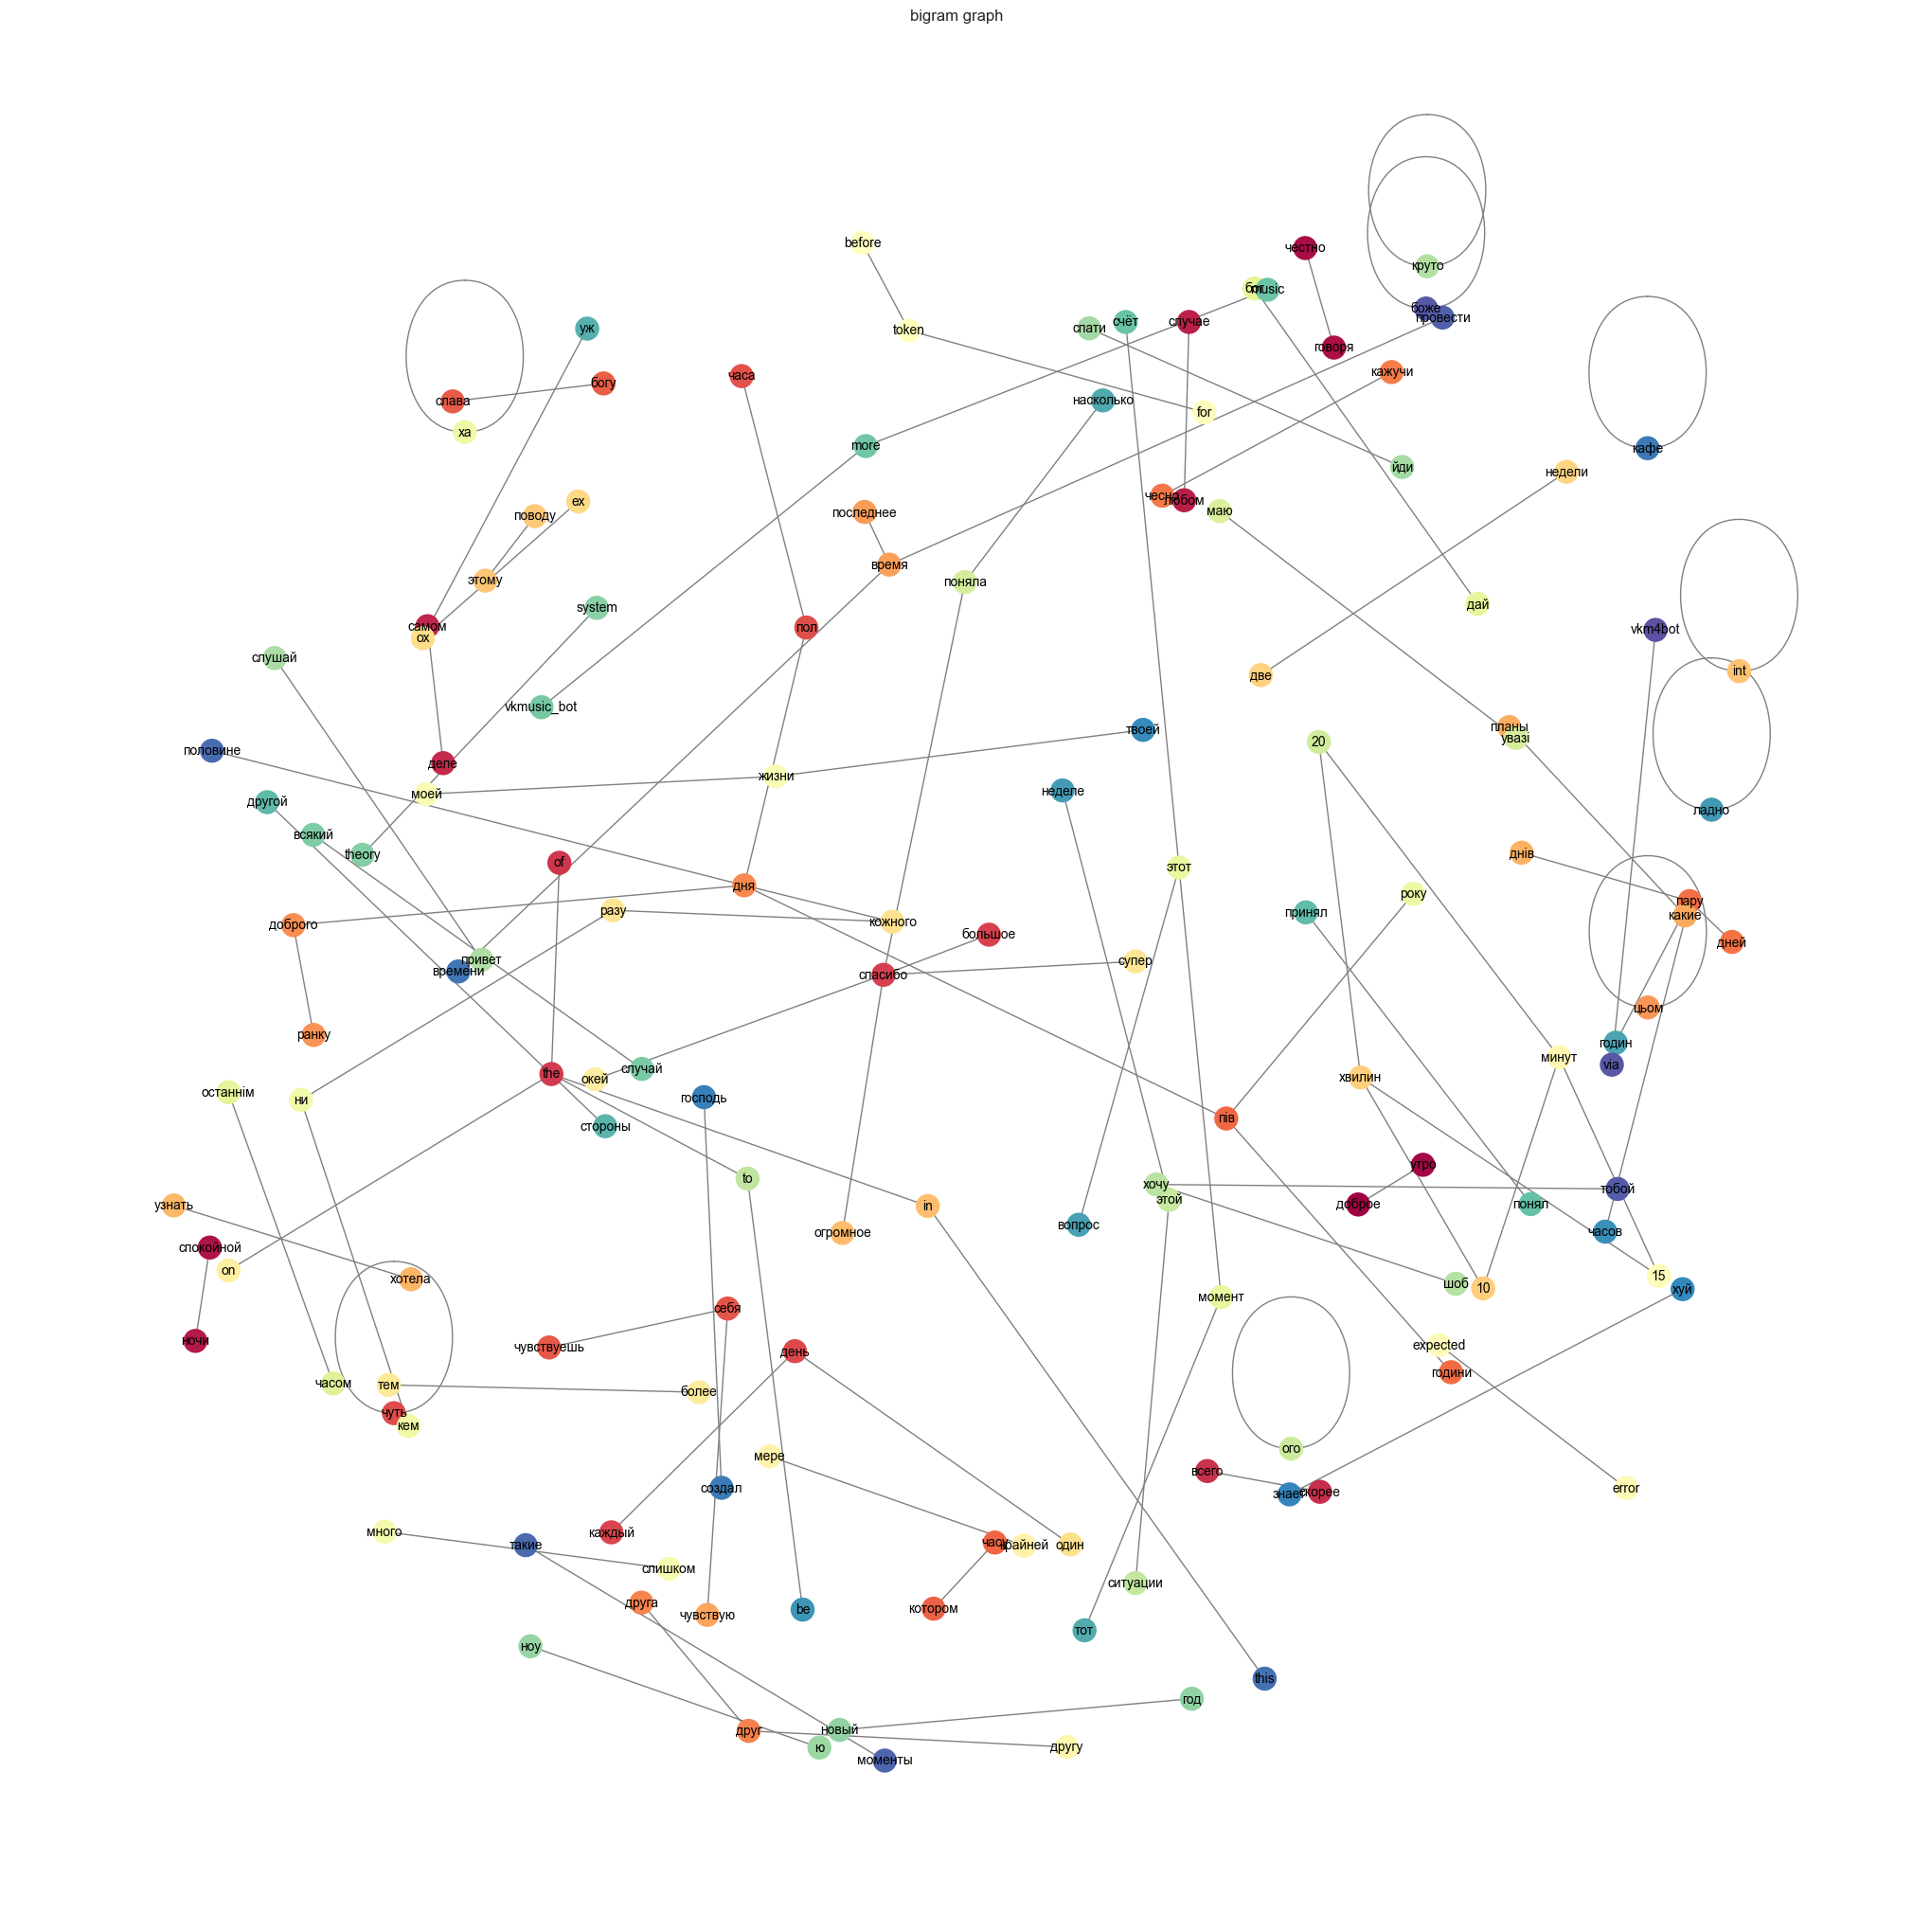

In [53]:
palette = sns.color_palette("Spectral", n_colors=len(graph.nodes()))
node_colors = [palette[i] for i in range(len(graph.nodes()))]
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(graph, k=0.75, iterations=20)
nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color='gray', font_size=10)
plt.title("bigram graph")
plt.show()

In [85]:
merged_df['language'] = merged_df['message'].apply(detect_language)
merged_df.loc[merged_df['language'] == 'bg', 'language'] = 'uk'
merged_df = merged_df[merged_df['language'] == 'uk']

In [86]:
merged_df_sentiment = merged_df.copy()
merged_df_sentiment = merged_df_sentiment.dropna(subset=['message'])

In [87]:
tone_dict = pd.read_csv('tone-dict-ukrainian/dicts/tone-dict-ua.csv')
merged_df['processed_message'] = merged_df['message'].str.lower()

text_messages = merged_df[merged_df['type'] == 'text']
text_messages = text_messages.dropna(subset=['message'])

In [89]:
def get_sentiment_score(message):
    words = message.split()
    scores = []
    for word in words:
        if word in tone_dict['term'].values:
            word_data = tone_dict[tone_dict['term'] == word]
            score = word_data['pstv'].values[0] - word_data['ngtv'].values[0]
            scores.append(score)
    return sum(scores) / len(scores) if scores else 0

In [90]:
text_messages['sentiment_score'] = text_messages['processed_message'].apply(lambda x: get_sentiment_score(x))

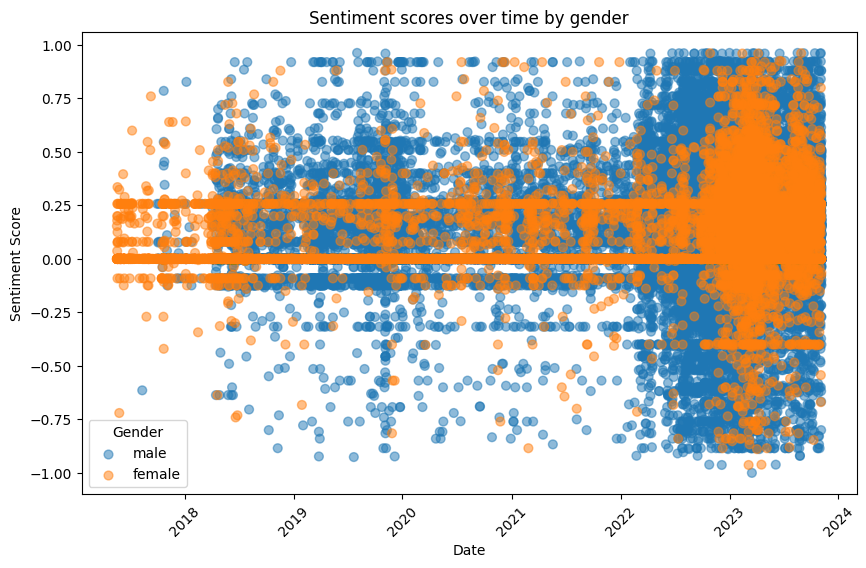

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

for sex in ['male', 'female']:
    df_sex = text_messages[text_messages['sex'] == sex]
    sizes = df_sex['language'].map({'uk': 40})
    ax.scatter(df_sex['date'], df_sex['sentiment_score'], s=sizes, alpha=0.5, label=sex)

ax.set_title('Sentiment scores over time by gender')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

In [143]:
filtered_messages = df_messages[df_messages["dialog_id"] >= 0]
filtered_messages["date"] = pd.to_datetime(filtered_messages["date"])
sorted_messages = filtered_messages.sort_values(by=["dialog_id", "date"])

sorted_messages["time_difference"] = sorted_messages.groupby("dialog_id")["date"].diff()
sorted_messages["time_diff_hours"] = sorted_messages["time_difference"].dt.total_seconds() / 3600

comm_time_df = sorted_messages[sorted_messages["time_diff_hours"] <= 5 / 60]

def generate_user_name(row):
    name_combined = " ".join(
        str(value)
        for value in [row.get(col) for col in ["first_name", "last_name"]]
        if pd.notnull(value)
    )
    if pd.notnull(name_combined) and name_combined.strip():
        return name_combined

    user_name = row.get("username")
    if pd.notnull(user_name) and user_name.strip():
        return user_name

    return row["dialog_id"]

comm_time_aggregated = (comm_time_df.groupby(["dialog_id", comm_time_df["date"].dt.date])["time_diff_hours"].sum().reset_index())
comm_time_aggregated.columns = ["dialog_id", "date", "total_communication_time"]
merged_user_comm_time = pd.merge(comm_time_aggregated, df_users, left_on="dialog_id", right_on="user_id", how="inner")
merged_user_comm_time["user_name"] = merged_user_comm_time.apply(generate_user_name, axis=1)

user_stats = (merged_user_comm_time.groupby(["user_id", "user_name", "sex"])["total_communication_time"].agg(["mean", "max", "median", "sum"]).reset_index())
user_stats = user_stats.sort_values(by="max", ascending=False)
user_stats = user_stats[user_stats["sum"] > 1]

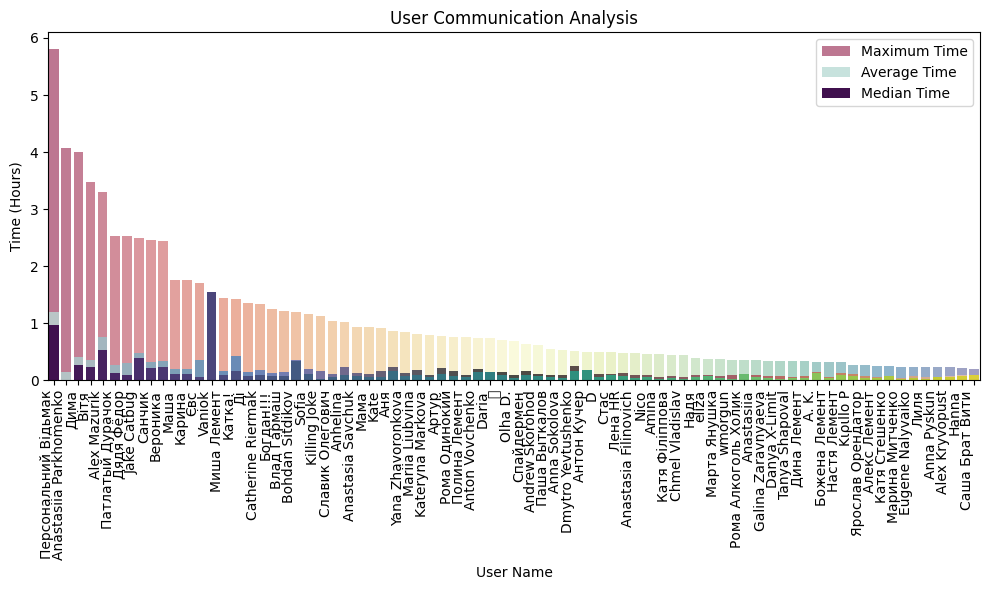

In [158]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="user_name",
    y="max",
    data=user_stats,
    palette="Spectral",
    alpha=0.6,
    label="Maximum Time"
)

sns.barplot(
    x="user_name",
    y="mean",
    data=user_stats,
    palette="icefire",
    alpha=0.8,
    label="Average Time"
)

sns.barplot(
    x="user_name", 
    y="median", 
    data=user_stats, 
    palette="viridis", 
    label="Median Time"
)

plt.title("User Communication Analysis")
plt.xlabel("User Name")
plt.ylabel("Time (Hours)")
plt.legend()
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

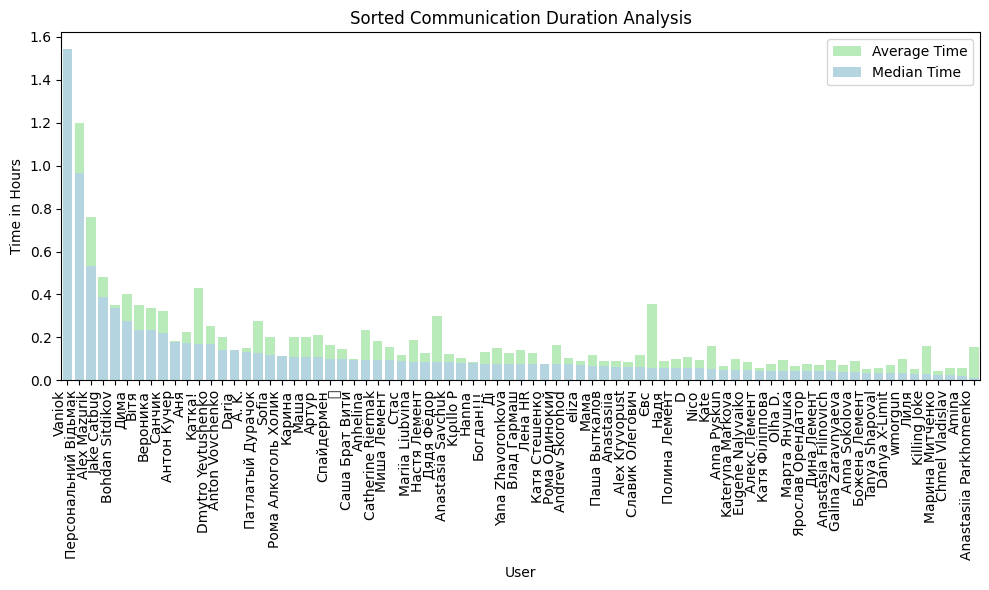

In [161]:
sorted_stats = user_stats.sort_values(by="median", ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    x="user_name",
    y="mean",
    data=sorted_stats,
    color="lightgreen",
    alpha=0.7,
    label="Average Time"
)

sns.barplot(
    x="user_name",
    y="median",
    data=sorted_stats,
    color="lightblue",
    label="Median Time"
)

plt.title("Sorted Communication Duration Analysis")
plt.xlabel("User")
plt.ylabel("Time in Hours")
plt.xticks(rotation=90, ha="right")
plt.legend()
plt.tight_layout()